## Import standard Libraries and packages

In [121]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## Project Objectives and Dataset Source

- **Objective**: This project is created to explore, analyze, and understand the current energy production from renewable energy sources in North America.
- **Analytics Type**: Descriptive Analytics. Thus, this project will summarize key features of the dataset to describe what happened in the past and provide digestible snapshots for visualization purposes.
- **Data Type**: Structured data (Nemerical and Categorical), Non time-series. Since it's a structured dataset, the clean dataset will be stored in a SQL database such as SQL Elephant or PostgreSQL.
- **Visualization Method**: Python libraries such as MatplotLib, Seaborn. In addition, a dashboard will also be created using Power BI.
- **Data Source**: A static dataset (not streaming) called "PowerPlantsRenewGE1MW_NorthAmerica_201708.xlxs" was obtained from Government of Canada website, https://open.canada.ca/data/en/dataset/490db619-ab58-4a2a-a245-2376ce1840de
- Dataset includes:
      *   Stations with installed capacipy of more than 1MG electrical energy generated from renewable energy sources.
      *   Data were collected for all countries in North America
      *   Renewable Energy sources include: biomass, hydroelectric, pumped-storage hydroelectric, geothermal, solar, and wind.





## Brief Overview of Final Results

**Questions to answer:**
*   Capacity of each country
*   Capacity of each State
*   Capacity by source of each country



**Results summary for the period between 2000-2017:**
*   Within North America, U.S is the leader in electrical power production with 67.8% contribution to the total capacity produced within North America. Canada follows with 27.5% and finally Mexico with 4.8%.
*   Within Canada, the top 3 provinces that produce electrical power are Quebec (44,402 MW), follows by British Columbia (17,642 MW) and Ontario (15,996 MW). The rest of the provinces produce less than 7000 kW each, thus making up small percentage in the contribution to the total power production. The breakdown of Capacity by source for each state is also provided. For example, Hydroelectric power is the main energy source in Canada and is most produced  in Quebec, BC, Ontario, Newfoundland, and BC in descending order. The second most important energy source in Canada is Wind, which is most produced in Ontario, Quebec, and Alberta in descending order. Solar energy source is mainly produced in Ontatio. 
*   Within US, the top 3 states that produce electrical power are California (34,199 MW), follows by Washington (25,000 MW) and Texas (23,152 MW). The rest of the states produce less than 12000 kW each. The breakdown of Capacity by source for the top 20 states are also provided. For example, Hydroelectric power is the main source in Washington, Oregon, Newyork, and Arizona.
*   Within Mexico, the top 3 territories that produce electrical power are Chiapas (4860 MW), follows by Oaxaca (2702 MW) and Nayarit (2543 MW). The rest of the territories produce less than 1800 kW each. The breakdown of Capacity by source is also provided. For example, Hydroelectric power is the main source in Chiapas, Nayarit, Guerrero, Sinaloa, etc.
*   US has the diversified power industry. The energy is produced from 10 major sources. The top 5 major sources are Wind, Hydroelectric, Solar, Pumped Storage, and Biomass in the descending order.
*   Canada is much more restricted to only 4-5 energy sources. The majority of power is produced from Hydroelectric, follow by Wind. A much smaller amount of energy is produced from Solarand Biomass.
*    Mexico is much more restricted to only 2 energy sources, Hydroelectric and Wind.


# Next Step

- Load clean dataset onto Elephant SQL (PostgreSQL).
- Join with other datasets and create insightful dashboard.

# Coding Start

## Data Loading

In [5]:
raw_data = pd.read_excel("PowerPlantsRenewGE1MW_NorthAmerica_201708.xlsx")
raw_data.head()

,Country,Facility Name,Owner Name (Company),Operator Name,Latitude,Longitude,City (Site Name),County,State / Province / Territory,Zip Code / Postal Code,Address,Total Capacity (MW),Total Renewable Capacity (MW),Primary Energy Source,Primary Renewable Energy Source,Coal (MW),Natural Gas (MW),Petroleum (MW),Other Energy Source (MW),Hydroelectric (MW),Pumped-Storage Hydroelectric (MW),Nuclear (MW),Solar (MW),Wind (MW),Geothermal (MW),Biomass (MW),Tidal (MW),Source Agency,Reference Period
0,Mexico,Santa Rosalía,Comisión Federal de Electricidad,CFE,27.410710,-112.529196,Mulegé,NaN,Baja California Sur,NaN,NaN,1.0,1.0,Solar,Solar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,CFE-CENACE,201708
1,Mexico,Plamex,"Plantronics, Inc.",Privado,32.416893,-115.234141,Tijuana,NaN,Baja California,NaN,NaN,1.0,1.0,Solar,Solar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,CFE-CENACE,201708
2,Mexico,Tirio,Comisión Federal de Electricidad,CFE,19.629724,-101.258937,Morelia,NaN,Michoacán,NaN,NaN,1.1,1.1,Hydroelectric,Hydroelectric,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0,CFE-CENACE,201708
3,Mexico,Hidroelectrica Cajon de Peña,"INDUSTRIAS WACK, S. A. DE C. V.",Privado,20.017135,-105.221590,Tomatlán,NaN,Jalisco,NaN,NaN,1.2,1.2,Hydroelectric,Hydroelectric,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0,CFE-CENACE,201708
4,Mexico,Papelera Veracruzana,"Papelera Veracruzana, S. A. De C. V.",Privado,18.834267,-97.103047,Orizaba,NaN,Veracruz,NaN,NaN,1.3,1.3,Hydroelectric,Hydroelectric,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0,CFE-CENACE,201708


In [6]:
raw_data.columns

Index(['Country', 'Facility Name', 'Owner Name (Company)', 'Operator Name',
       'Latitude', 'Longitude', 'City (Site Name)', 'County',
       'State / Province / Territory', 'Zip Code / Postal Code', 'Address',
       'Total Capacity (MW)', 'Total Renewable Capacity (MW)',
       'Primary Energy Source', 'Primary Renewable Energy Source', 'Coal (MW)',
       'Natural Gas (MW)', 'Petroleum (MW)', 'Other Energy Source (MW)',
       'Hydroelectric (MW)', 'Pumped-Storage Hydroelectric (MW)',
       'Nuclear (MW)', 'Solar (MW)', 'Wind (MW)', 'Geothermal (MW)',
       'Biomass (MW)', 'Tidal (MW)', 'Source Agency', 'Reference Period'],
      dtype='object')

In [7]:
raw_data["Primary Energy Source"].value_counts()

Hydroelectric     2037
Solar             2034
Wind              1284
Biomass            846
Geothermal          73
Pumped Storage      37
Natural Gas         29
Petroleum           21
Coal                 8
Other                6
Tidal                1
Nuclear              1
Name: Primary Energy Source, dtype: int64

In [8]:
raw_data["Primary Renewable Energy Source"].value_counts()

Solar             2052
Hydroelectric     2051
Wind              1293
Biomass            868
Geothermal          73
Pumped Storage      36
Other                3
Tidal                1
Name: Primary Renewable Energy Source, dtype: int64

## Data Validation and Cleaning

In [9]:
# Drop unimportant columns
df = raw_data.drop(["Owner Name (Company)","Operator Name", "County", "Zip Code / Postal Code", "Zip Code / Postal Code", "Address", "Total Renewable Capacity (MW)", "Primary Renewable Energy Source", "Source Agency"], axis="columns", inplace=False)

In [10]:
# Check for irregular data entries by looking at stats summary
df.describe()

,Latitude,Longitude,Total Capacity (MW),Coal (MW),Natural Gas (MW),Petroleum (MW),Other Energy Source (MW),Hydroelectric (MW),Pumped-Storage Hydroelectric (MW),Nuclear (MW),Solar (MW),Wind (MW),Geothermal (MW),Biomass (MW),Tidal (MW),Reference Period
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.00000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,40.158392,-94.189030,55.495139,0.760499,0.569766,0.101129,0.030532,27.031018,3.410177,0.307260,4.00795,15.582468,0.719947,2.971256,0.003136,199443.013486
std,6.352200,19.548288,211.890057,33.245606,15.319266,2.612723,0.774814,190.889000,65.062631,24.536629,19.94884,48.938319,16.227568,13.040922,0.250450,21100.561383
min,14.961318,-165.429814,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,35.549401,-114.967778,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,201705.000000
50%,40.756944,-89.516700,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,201705.000000
75%,44.298354,-77.383889,39.900000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000,1.60000,0.000000,0.000000,0.000000,0.000000,201705.000000
max,66.837778,-52.712262,6809.000000,1822.500000,980.600000,157.600000,36.000000,6495.000000,2862.000000,1959.400000,585.90000,735.500000,1163.000000,215.000000,20.000000,201708.000000




*   All max and min values are within the realistic ranges, except for column Reference Period where max value is 201708 and min is 2000. This mean there is at least one row that missing the month entry.
*   Percentage contribution of each energy source to the total renewable capacity seems reasonable. Further investigation of the dataset will confirm the accuracy of this dataset.



In [11]:
# Create a new column "Year" as few sites only have year recorded
df["Year"]= df['Reference Period'].astype(str).str[:4]
df["Month"] = df['Reference Period'].astype(str).str[4:]

In [12]:
# The month column have all months except october. Assume that the empty spaces are meant to be october. Thus replace as following
df["Month"].replace('', '10', regex=True, inplace=True)

In [13]:
# Convert columns Year and Month to numeric and comebine into a column Date
pd.to_numeric(df["Year"])
pd.to_numeric(df["Month"])
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [14]:
# Drop reference period, Year, and Month column
df = df.drop(["Reference Period","Year", "Month"], axis="columns")
df.head()

,Country,Facility Name,Latitude,Longitude,City (Site Name),State / Province / Territory,Total Capacity (MW),Primary Energy Source,Coal (MW),Natural Gas (MW),Petroleum (MW),Other Energy Source (MW),Hydroelectric (MW),Pumped-Storage Hydroelectric (MW),Nuclear (MW),Solar (MW),Wind (MW),Geothermal (MW),Biomass (MW),Tidal (MW),Date
0,Mexico,Santa Rosalía,27.410710,-112.529196,Mulegé,Baja California Sur,1.0,Solar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2017-08-01
1,Mexico,Plamex,32.416893,-115.234141,Tijuana,Baja California,1.0,Solar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2017-08-01
2,Mexico,Tirio,19.629724,-101.258937,Morelia,Michoacán,1.1,Hydroelectric,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
3,Mexico,Hidroelectrica Cajon de Peña,20.017135,-105.221590,Tomatlán,Jalisco,1.2,Hydroelectric,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
4,Mexico,Papelera Veracruzana,18.834267,-97.103047,Orizaba,Veracruz,1.3,Hydroelectric,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01


In [15]:
# Check for nan values
df.isnull().sum()

Country                               0
Facility Name                         0
Latitude                              0
Longitude                             0
City (Site Name)                     83
State / Province / Territory          1
Total Capacity (MW)                   0
Primary Energy Source                 0
Coal (MW)                             0
Natural Gas (MW)                      0
Petroleum (MW)                        0
Other Energy Source (MW)              0
Hydroelectric (MW)                    0
Pumped-Storage Hydroelectric (MW)     0
Nuclear (MW)                          0
Solar (MW)                            0
Wind (MW)                             0
Geothermal (MW)                       0
Biomass (MW)                          0
Tidal (MW)                            0
Date                                  0
dtype: int64

- Since only city and state columns have some missing values. However, we can use longitude and latitude to generate the map of these sites. We will keep these rows.

In [16]:
# Clean up few column names
df.rename(columns={"City (Site Name)": "City", "State / Province / Territory": "State", "Primary Energy Source": "Source"}, errors="raise", inplace=True)

In [17]:
# Remaining Column names and data type
df.dtypes

Country                                      object
Facility Name                                object
Latitude                                    float64
Longitude                                   float64
City                                         object
State                                        object
Total Capacity (MW)                         float64
Source                                       object
Coal (MW)                                   float64
Natural Gas (MW)                            float64
Petroleum (MW)                              float64
Other Energy Source (MW)                    float64
Hydroelectric (MW)                          float64
Pumped-Storage Hydroelectric (MW)           float64
Nuclear (MW)                                float64
Solar (MW)                                  float64
Wind (MW)                                   float64
Geothermal (MW)                             float64
Biomass (MW)                                float64
Tidal (MW)  

In [18]:
df["Source"].value_counts()

Hydroelectric     2037
Solar             2034
Wind              1284
Biomass            846
Geothermal          73
Pumped Storage      37
Natural Gas         29
Petroleum           21
Coal                 8
Other                6
Tidal                1
Nuclear              1
Name: Source, dtype: int64

In [19]:
# Check for duplicates
df.duplicated(keep='first').sum()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

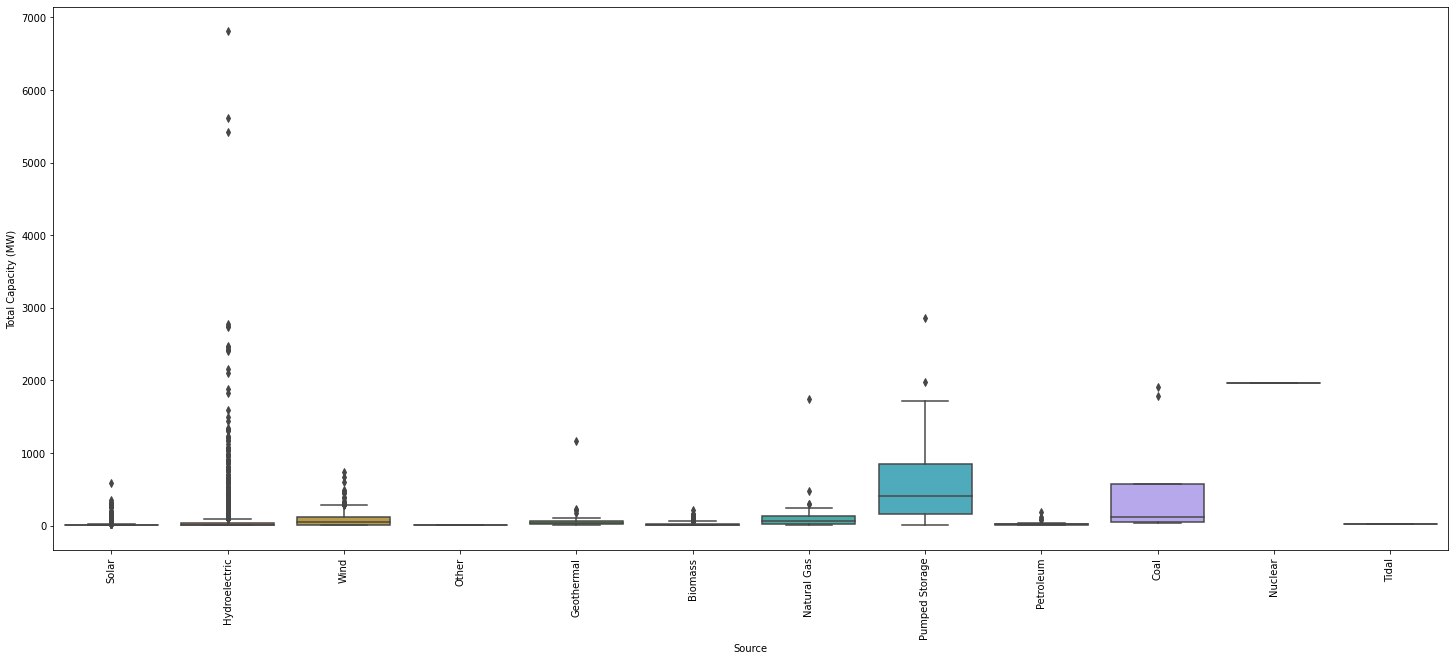

In [20]:
# Boxplot
plt.figure(figsize=(25,10))
sns.boxplot(x='Source'  , y='Total Capacity (MW)'  , data=df)
plt.xticks(rotation=90)

- As we see, most of power plants have capacity within a close range, except Hydroelectric power plants. The capacity of hydroelectric power plants are 27MW in average but can be as large as 6495 MW.

In [21]:
df["Hydroelectric (MW)"].describe()

count    6377.000000
mean       27.031018
std       190.889000
min         0.000000
25%         0.000000
50%         0.000000
75%         2.900000
max      6495.000000
Name: Hydroelectric (MW), dtype: float64

# Data Exploration & Visualizations

In [22]:
df.dtypes

Country                                      object
Facility Name                                object
Latitude                                    float64
Longitude                                   float64
City                                         object
State                                        object
Total Capacity (MW)                         float64
Source                                       object
Coal (MW)                                   float64
Natural Gas (MW)                            float64
Petroleum (MW)                              float64
Other Energy Source (MW)                    float64
Hydroelectric (MW)                          float64
Pumped-Storage Hydroelectric (MW)           float64
Nuclear (MW)                                float64
Solar (MW)                                  float64
Wind (MW)                                   float64
Geothermal (MW)                             float64
Biomass (MW)                                float64
Tidal (MW)  

In [23]:
print(df["Date"].max(), "," , df["Date"].min())

2017-08-01 00:00:00 , 2000-10-01 00:00:00


### 1. Capacity by Country

In [24]:
country_capacity = df.groupby(["Country", "State"]).agg(
        country_capacity_sum=pd.NamedAgg(column='Total Capacity (MW)', aggfunc='sum'),
        country_capacity_max=pd.NamedAgg(column='Total Capacity (MW)', aggfunc='max'),
        country_capacity_cnt=pd.NamedAgg(column='Total Capacity (MW)', aggfunc='count')
    )

In [25]:
country_capacity["Contribution (%)"] = country_capacity["country_capacity_sum"] / country_capacity["country_capacity_sum"].sum()

In [26]:
country_capacity

country_capacity_sum  ...  Contribution (%)
Country       State                                            ...                  
Canada        Alberta                                  2772.9  ...          0.007836
              British Columbia                        17642.6  ...          0.049855
              Manitoba                                 5509.4  ...          0.015569
              New Brunswick                            1378.5  ...          0.003895
              Newfoundland and Labrador                7028.1  ...          0.019860
...                                                       ...  ...               ...
United States Virginia                                 7141.7  ...          0.020181
              Washington                              25000.3  ...          0.070647
              West Virginia                            1088.9  ...          0.003077
              Wisconsin                                1967.5  ...          0.005560
              Wyoming                                  1790.7  ...          0.005060

[85 rows x 4 columns]

In [27]:
capacity_by_country = country_capacity.groupby("Country")["country_capacity_sum"].sum()

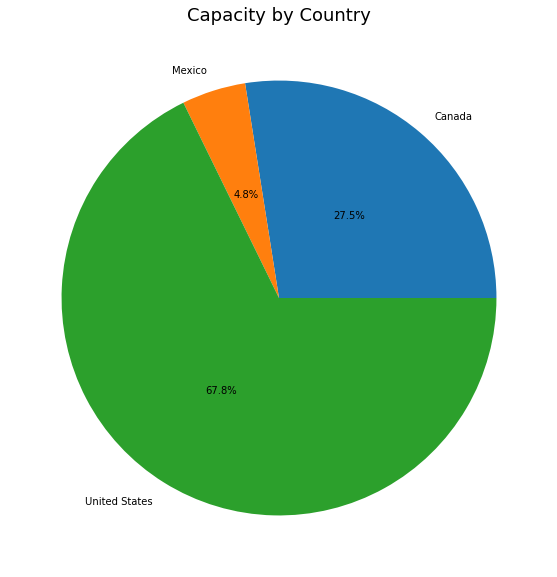

In [28]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[20,10])
labels = capacity_by_country.keys()
plt.pie(x=capacity_by_country, autopct="%.1f%%",  labels=labels, pctdistance=0.5)
plt.title("Capacity by Country", fontsize=18);
# pie.savefig("DeliveryPieChart.png")

In [29]:
capacity_by_country

Country
Canada            97298.8
Mexico            16823.0
United States    239756.6
Name: country_capacity_sum, dtype: float64

### 2. Capacity by State for Each Country

In [30]:
# Canada
canada_data = country_capacity.loc['Canada', :]

In [57]:
canada_data_sorted= canada_data.sort_values('country_capacity_sum', ascending=True)
canada_data_sorted.tail()

,country_capacity_sum,country_capacity_max,country_capacity_cnt,Contribution (%)
State,,,,
Manitoba,5509.4,1350.0,18,0.015569
Newfoundland and Labrador,7028.1,5428.0,36,0.019860
Ontario,15996.0,1499.0,411,0.045202
British Columbia,17642.6,2746.0,167,0.049855
Québec,44402.1,5616.0,205,0.125473


Text(0.5, 1.0, 'Total Capacity by State')

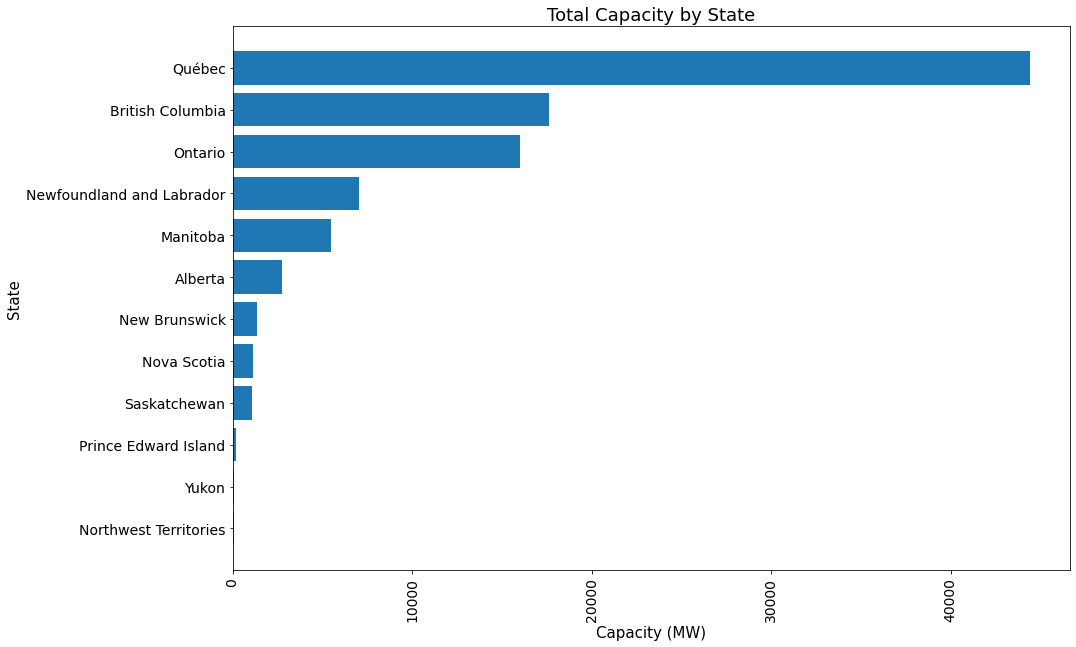

In [56]:
# bar plot with matplotlib

plt.figure(figsize=(15,10))
plt.barh(canada_data_sorted.index, 'country_capacity_sum',data=canada_data_sorted)
plt.xlabel("Capacity (MW)", size=15)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel("State", size=15)
plt.title("Total Capacity by State", size=18)
# plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")

In [33]:
# US
US_data = country_capacity.loc['United States', :] 

In [34]:
US_data_sorted= US_data.sort_values('country_capacity_sum', ascending=True)
US_data_sorted.head()

,country_capacity_sum,country_capacity_max,country_capacity_cnt,Contribution (%)
State,,,,
Delaware,46.5,11.8,12,0.000131
Rhode Island,105.9,34.0,20,0.000299
Mississippi,302.5,128.6,7,0.000855
Connecticut,453.1,90.0,34,0.001280
Alaska,597.9,126.0,36,0.001690


Text(0.5, 1.0, 'Total Capacity by State')

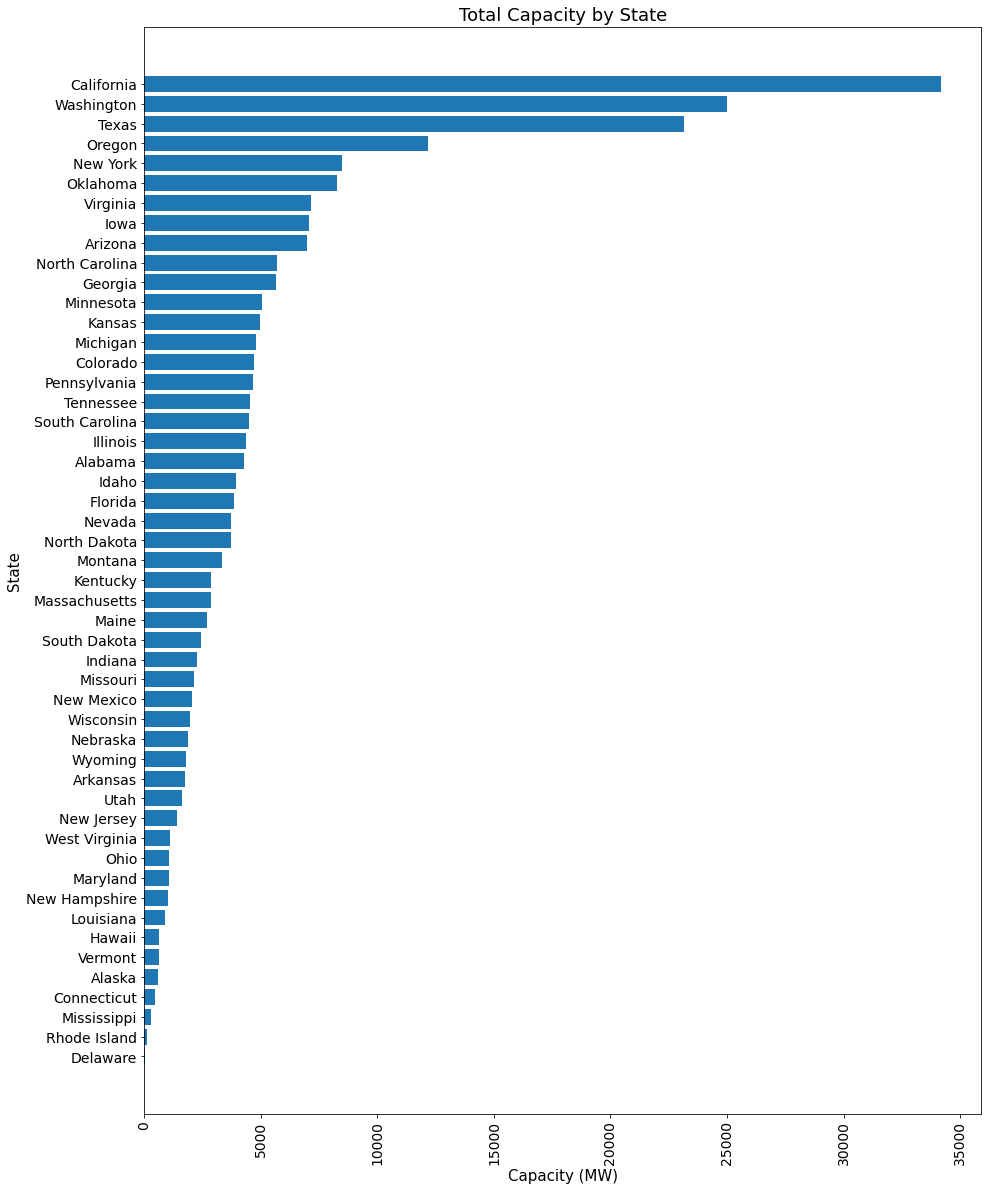

In [35]:
# bar plot with matplotlib

plt.figure(figsize=(15,20))
plt.barh(US_data_sorted.index, 'country_capacity_sum',data=US_data_sorted)
plt.xlabel("Capacity (MW)", size=15)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel("State", size=15)
plt.title("Total Capacity by State", size=18)
# plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")

In [36]:
# Mexico
Mexico_data = country_capacity.loc['Mexico', :]

In [37]:
Mexico_data_sorted= Mexico_data.sort_values('country_capacity_sum', ascending=True)
Mexico_data_sorted.head()

,country_capacity_sum,country_capacity_max,country_capacity_cnt,Contribution (%)
State,,,,
Quintana Roo,1.5,1.5,1,0.000004
Guanajuato,2.5,2.5,1,0.000007
Ciudad de México,6.6,6.6,1,0.000019
Chihuahua,28.0,25.0,2,0.000079
Baja California Sur,41.0,30.0,3,0.000116


Text(0.5, 1.0, 'Total Capacity by State')

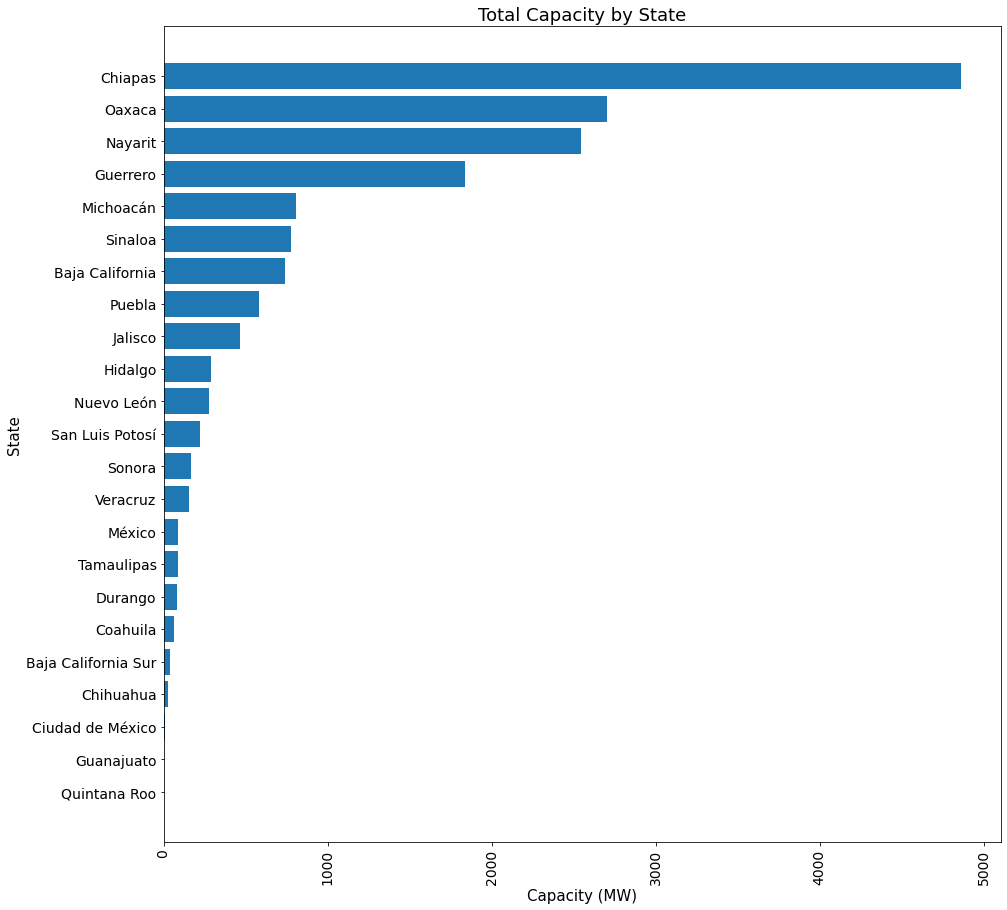

In [38]:
# bar plot with matplotlib

plt.figure(figsize=(15,15))
plt.barh(Mexico_data_sorted.index, 'country_capacity_sum',data=Mexico_data_sorted)
plt.xlabel("Capacity (MW)", size=15)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel("State", size=15)
plt.title("Total Capacity by State", size=18)
# plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")

### 3. Capacity by Source for Each Country

In [39]:
df_pivot = pd.pivot_table(
    df, 
    values="Total Capacity (MW)",
    index="Source",
    columns="Country", 
    aggfunc=np.sum
)

In [40]:
df_pivot_sorted = df_pivot.sort_values('United States', ascending=False)
df_pivot_sorted_T = df_pivot_sorted.transpose()

Text(0.5, 1.0, 'Capacity by Source')

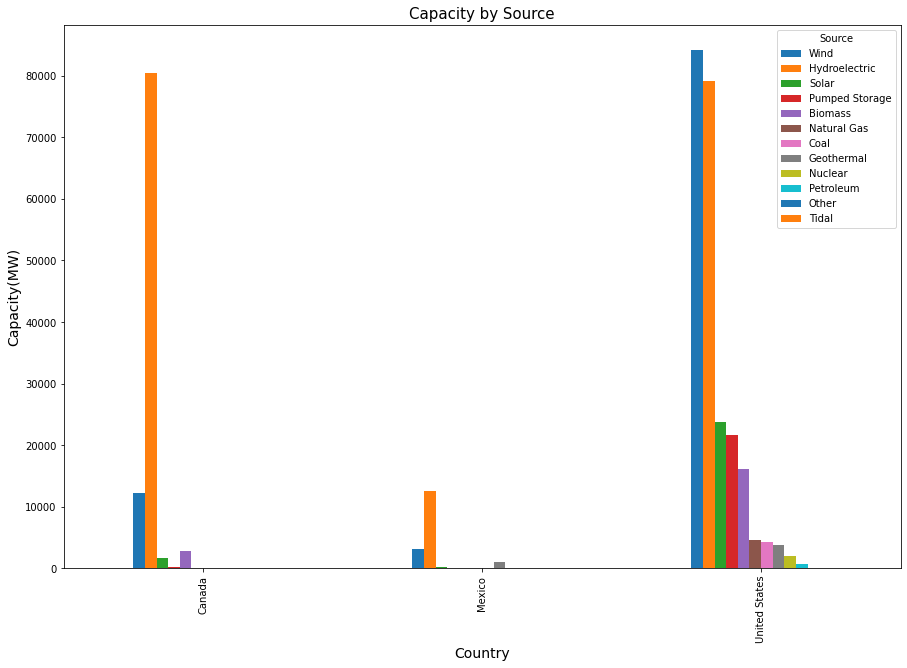

In [41]:
# Plot a bar chart using the DF
ax = df_pivot_sorted_T.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15,10)
# Change the axes labels
ax.set_xlabel("Country", size = 14)
ax.set_ylabel("Capacity(MW)", size = 14)
ax.set_title("Capacity by Source", size=15)

### 4. Capacity by Source for each State

In [74]:
# Canada
canada_df = df.loc[df['Country'] == 'Canada']

In [86]:
canada_state_pivot = pd.pivot_table(
    canada_df, 
    values="Total Capacity (MW)",
    index="Source",
    columns="State", 
    aggfunc=np.sum
)

In [88]:
canada_state_pivot_sorted = canada_state_pivot.sort_values('Ontario', ascending=False)
canada_state_pivot_sorted_T = canada_state_pivot_sorted.transpose()

Text(0.5, 1.0, 'Capacity by Source - Canada')

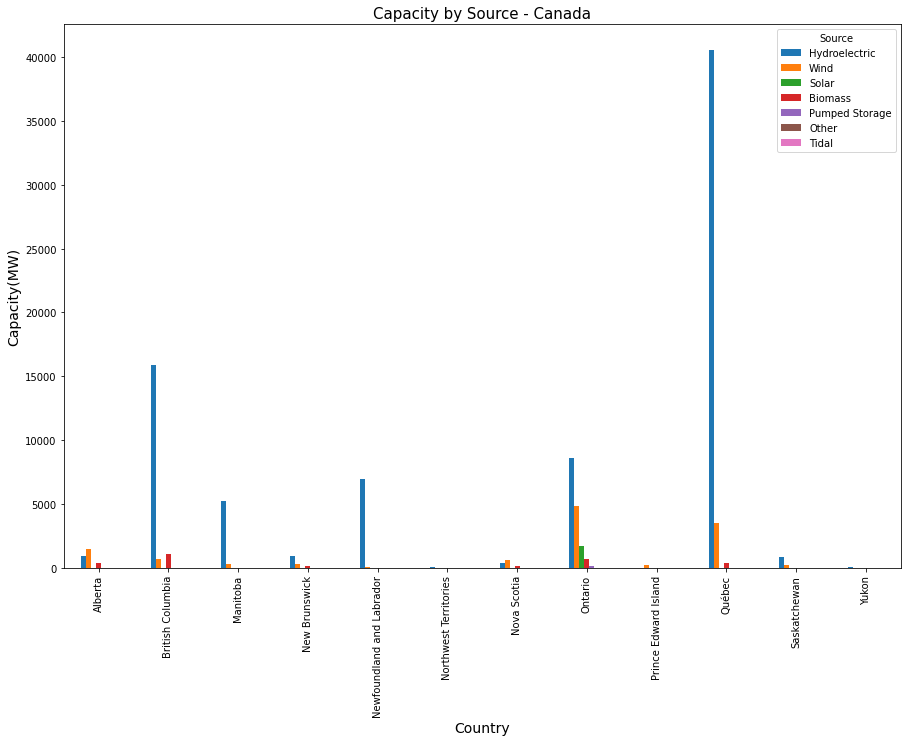

In [89]:
# Plot a bar chart using the DF
ax = canada_state_pivot_sorted_T.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15,10)
# Change the axes labels
ax.set_xlabel("Country", size = 14)
ax.set_ylabel("Capacity(MW)", size = 14)
ax.set_title("Capacity by Source - Canada", size=15)

In [91]:
# US
US_df = df.loc[df['Country'] == 'United States']

In [108]:
US_df_sorted = US_df.sort_values('Total Capacity (MW)', ascending=False)
US_df_sorted_top20 = US_df_sorted.iloc[:20, :]
US_df_sorted_top20.head()

,Country,Facility Name,Latitude,Longitude,City,State,Total Capacity (MW),Source,Coal (MW),Natural Gas (MW),Petroleum (MW),Other Energy Source (MW),Hydroelectric (MW),Pumped-Storage Hydroelectric (MW),Nuclear (MW),Solar (MW),Wind (MW),Geothermal (MW),Biomass (MW),Tidal (MW),Date
1916,United States,Grand Coulee,47.957511,-118.977323,Grand Coulee,Washington,6809.0,Hydroelectric,0.0,0.0,0.0,0.0,6495.0,314.0,0.0,0.0,0.0,0.0,0.0,0,2017-05-01
413,United States,Bath County,38.208890,-79.800000,Warm Springs,Virginia,2862.0,Pumped Storage,0.0,0.0,0.0,0.0,0.0,2862.0,0.0,0.0,0.0,0.0,0.0,0,2017-05-01
953,United States,Chief Joseph,47.995100,-119.640400,Bridgeport,Washington,2456.2,Hydroelectric,0.0,0.0,0.0,0.0,2456.2,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-05-01
3938,United States,Robert Moses Niagara,43.142700,-79.039400,Lewiston,New York,2429.1,Hydroelectric,0.0,0.0,0.0,0.0,2429.1,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-05-01
2411,United States,John Day,45.716440,-120.694080,The Dalles,Oregon,2160.0,Hydroelectric,0.0,0.0,0.0,0.0,2160.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-05-01


In [104]:
US_state_pivot = pd.pivot_table(
    US_df_sorted_top20, 
    values="Total Capacity (MW)",
    index="Source",
    columns="State", 
    aggfunc=np.sum
)

In [105]:
US_state_pivot_sorted = US_state_pivot.sort_values('Washington', ascending=False)
US_state_pivot_sorted_T = US_state_pivot_sorted.transpose()

Text(0.5, 1.0, 'Capacity by Source - US')

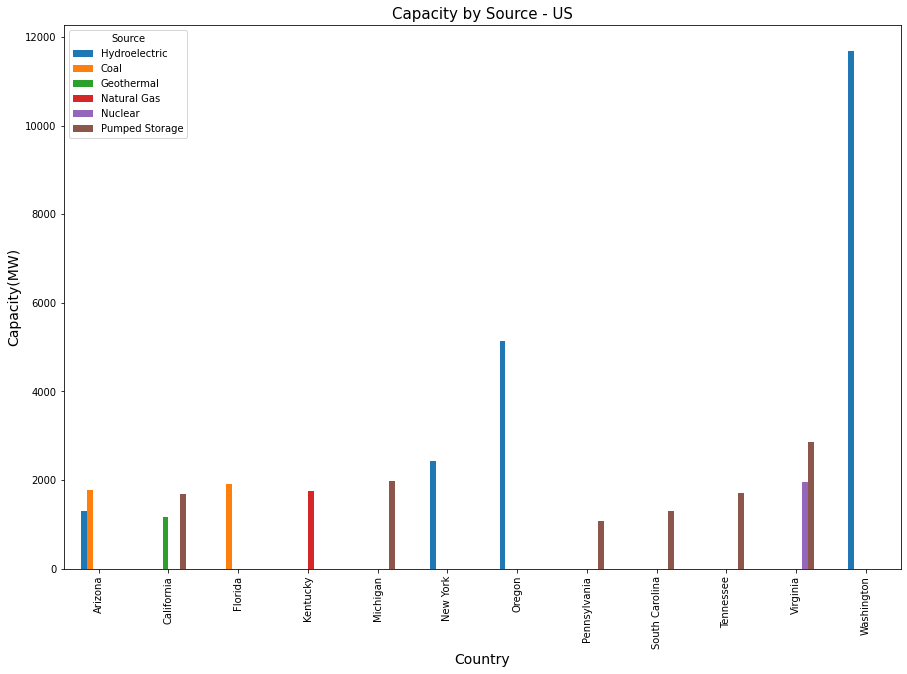

In [106]:
# Plot a bar chart using the DF
ax = US_state_pivot_sorted_T.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15,10)
# Change the axes labels
ax.set_xlabel("Country", size = 14)
ax.set_ylabel("Capacity(MW)", size = 14)
ax.set_title("Capacity by Source - US", size=15)

In [111]:
# Mexico
Mexico_df = df.loc[df['Country'] == 'Mexico']

In [116]:
Mexico_df_sorted = Mexico_df.sort_values('Total Capacity (MW)', ascending=False)
Mexico_df_sorted

,Country,Facility Name,Latitude,Longitude,City,State,Total Capacity (MW),Source,Coal (MW),Natural Gas (MW),Petroleum (MW),Other Energy Source (MW),Hydroelectric (MW),Pumped-Storage Hydroelectric (MW),Nuclear (MW),Solar (MW),Wind (MW),Geothermal (MW),Biomass (MW),Tidal (MW),Date
129,Mexico,Manuel Moreno Torres (Chicoasén),16.942800,-93.101175,Chicoasén,Chiapas,2400.0,Hydroelectric,0.0,0.0,0.0,0.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
128,Mexico,Infiernillo,18.271147,-101.893934,Montes de Oca,Guerrero,1200.0,Hydroelectric,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
127,Mexico,Malpaso,17.180596,-93.597336,Tecpatán,Chiapas,1080.0,Hydroelectric,0.0,0.0,0.0,0.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
126,Mexico,Aguamilpa Solidaridad,21.839472,-104.803783,Tepic,Nayarit,960.0,Hydroelectric,0.0,0.0,0.0,0.0,960.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
125,Mexico,Belisario Domínguez (Angostura),16.401774,-92.778425,Venustiano Carranza,Chiapas,900.0,Hydroelectric,0.0,0.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Mexico,Papelera Veracruzana,18.834267,-97.103047,Orizaba,Veracruz,1.3,Hydroelectric,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
3,Mexico,Hidroelectrica Cajon de Peña,20.017135,-105.221590,Tomatlán,Jalisco,1.2,Hydroelectric,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
2,Mexico,Tirio,19.629724,-101.258937,Morelia,Michoacán,1.1,Hydroelectric,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-08-01
1,Mexico,Plamex,32.416893,-115.234141,Tijuana,Baja California,1.0,Solar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2017-08-01


In [117]:
Mexico_state_pivot = pd.pivot_table(
    Mexico_df_sorted, 
    values="Total Capacity (MW)",
    index="Source",
    columns="State", 
    aggfunc=np.sum
)

In [118]:
Mexico_state_pivot_sorted = Mexico_state_pivot.sort_values('Chiapas', ascending=False)
Mexico_state_pivot_sorted_T = Mexico_state_pivot_sorted.transpose()

Text(0.5, 1.0, 'Capacity by Source - Mexico')

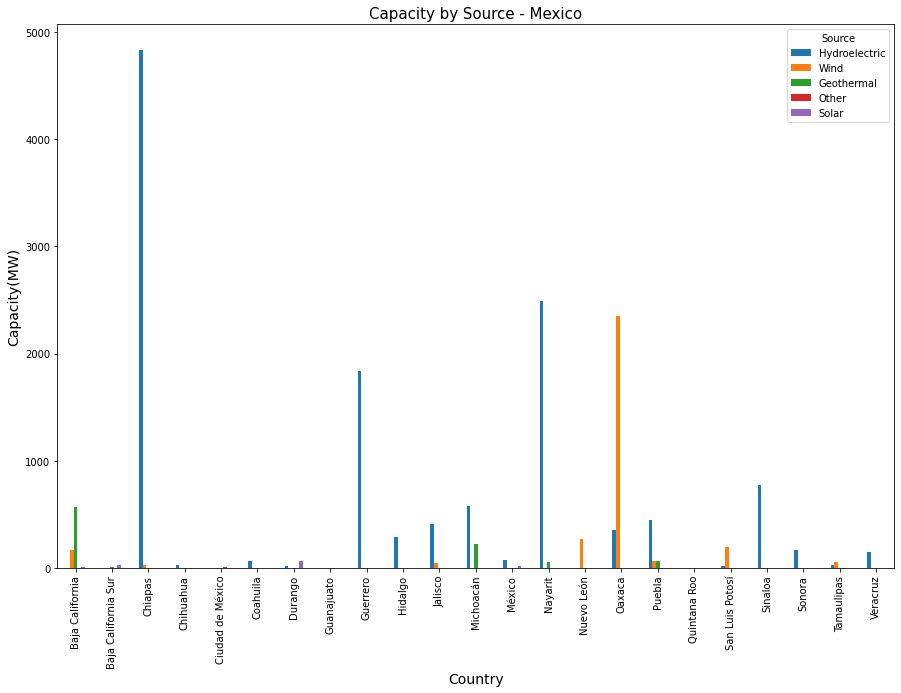

In [119]:
# Plot a bar chart using the DF
ax = Mexico_state_pivot_sorted_T.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15,10)
# Change the axes labels
ax.set_xlabel("Country", size = 14)
ax.set_ylabel("Capacity(MW)", size = 14)
ax.set_title("Capacity by Source - Mexico", size=15)

# END